# Importing  libaries

In [2]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib


import time  # Import time module
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc


# Importing the csv file (cicids 2017 friday)

In [3]:
df=pd.read_csv("ddos/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

# Data- preprocessing

In [7]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [9]:
df["Label"].value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

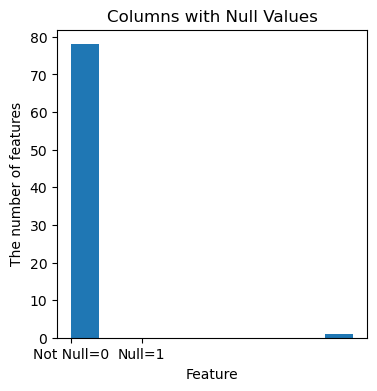

In [10]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 4,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

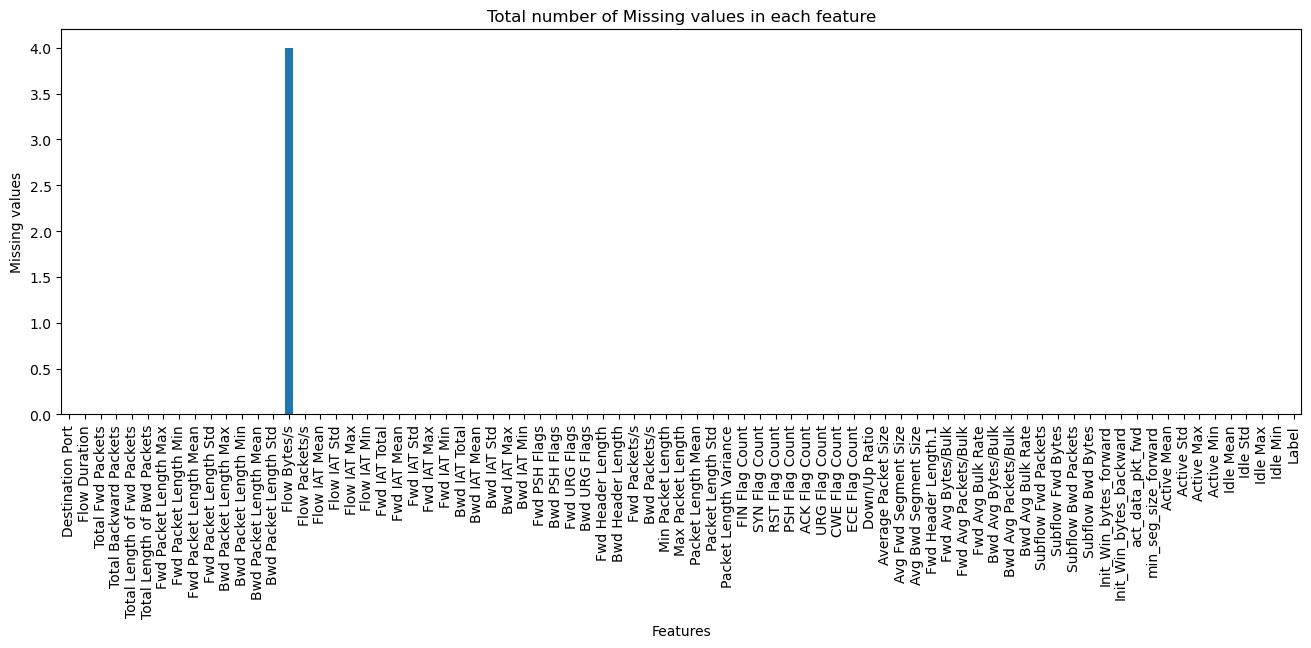

In [11]:
#checking which column has the null value in the dataset

def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [12]:
## Removing the null values
data_f=df.dropna()



data_f = df.replace([np.inf, -np.inf], np.nan).dropna()  # Handle infinite values

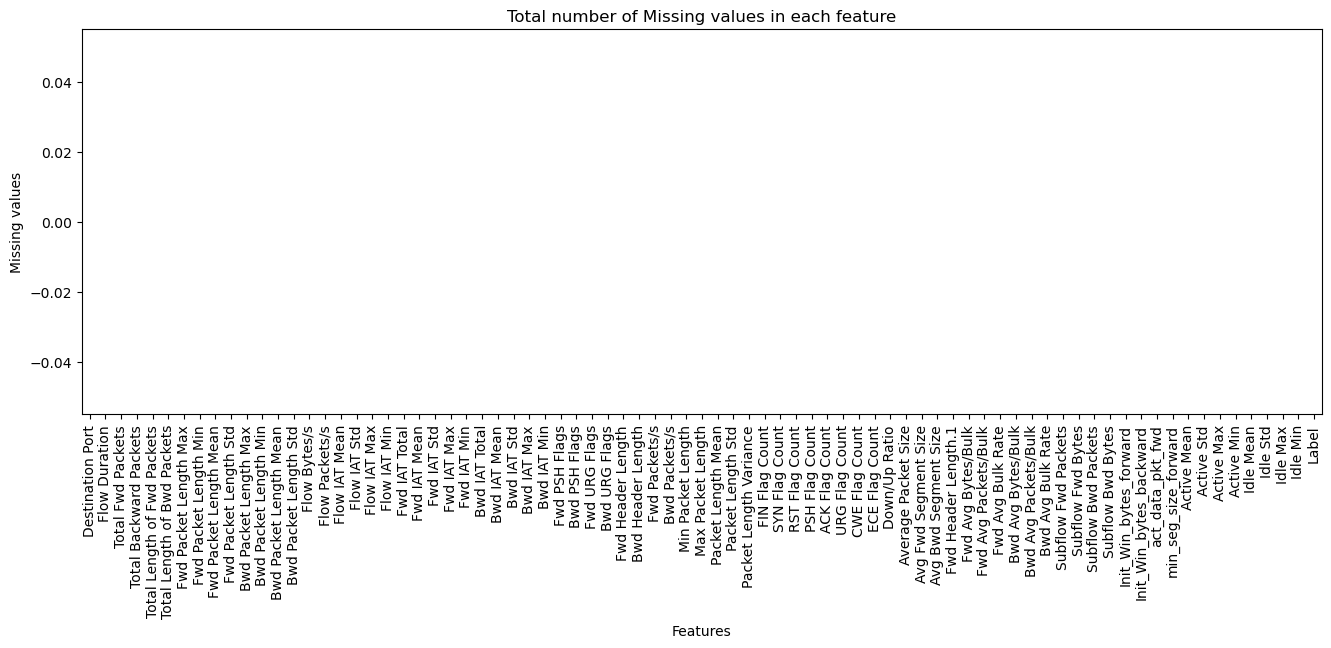

In [13]:
plotMissingValues(data_f)

In [14]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

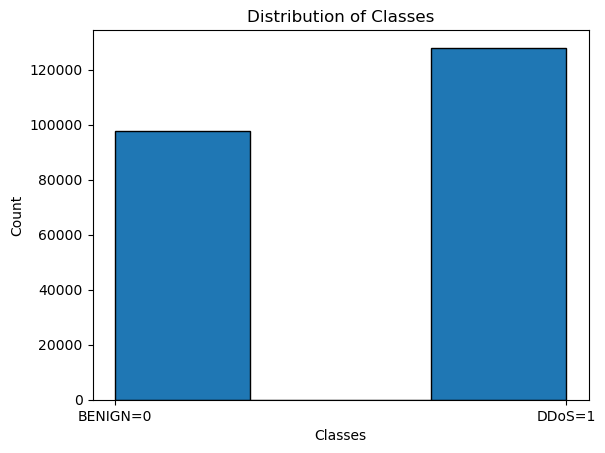

In [15]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title ('Distribution of Classes')
plt.show()

# data splitting


In [16]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1) #input data
y = data_f['Label'] ## target column

In [17]:
# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (180568, 78)
The test dataset size =  (45143, 78)


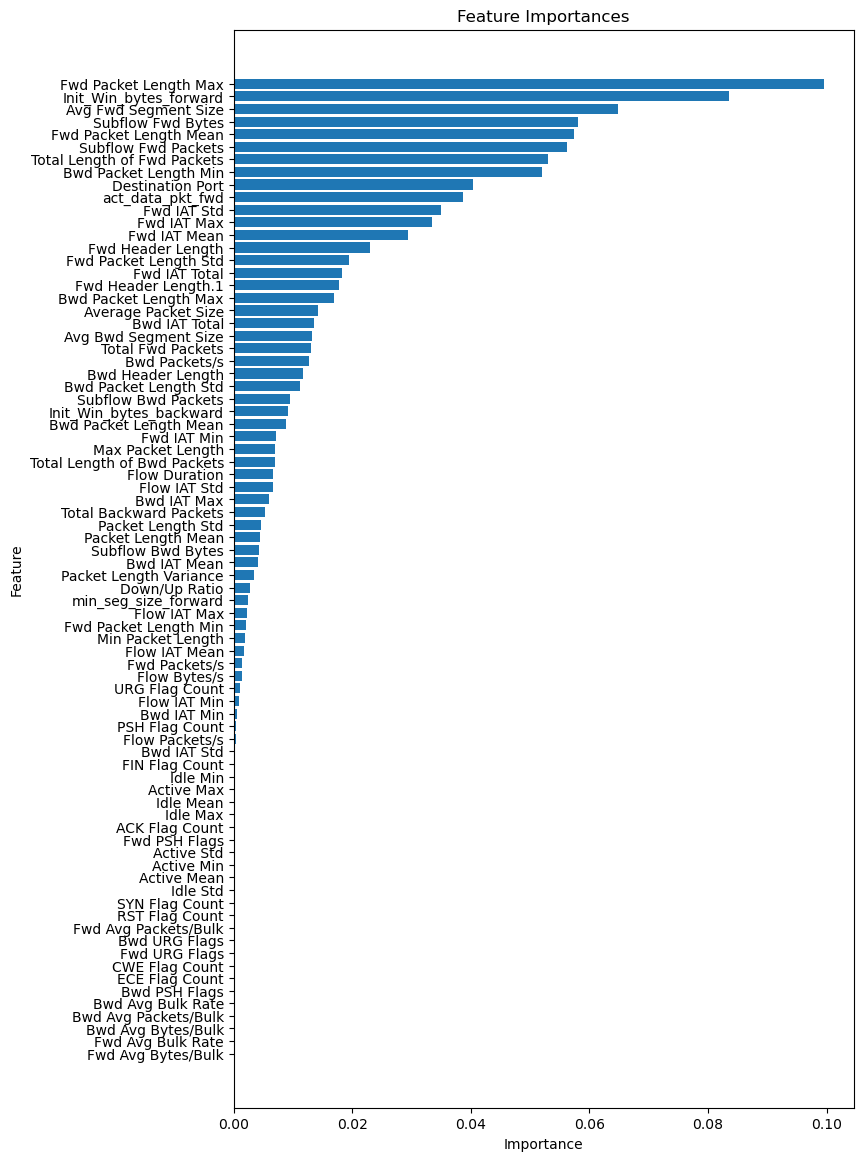

In [20]:
# Feature Selection using Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_table = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_table = importance_table.sort_values(by='Importance', ascending=False)

# Plot feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(importance_table["Feature"], importance_table["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [21]:

# Select top 10 important features
top_10_features = importance_table['Feature'].head(10).values
print("Top 10 Important Features:", top_10_features)


Top 10 Important Features: ['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd']


In [22]:
# Update X_train and X_test to include only the top features
X_train_selected = X_train[:, np.isin(X.columns, top_10_features)]
X_test_selected = X_test[:, np.isin(X.columns, top_10_features)]

In [23]:
''''# Evaluate Models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Evaluate all models
evaluate_model(rf_model, X_test_selected, y_test)
evaluate_model(log_reg_model, X_test_selected, y_test)
evaluate_model(svm_model, X_test_selected, y_test)'''''

'\'# Evaluate Models\ndef evaluate_model(model, X_test, y_test):\n    y_pred = model.predict(X_test)\n    print(f"Model: {model.__class__.__name__}")\n    print(classification_report(y_test, y_pred))\n    print(confusion_matrix(y_test, y_pred))\n    print("-" * 50)\n\n# Evaluate all models\nevaluate_model(rf_model, X_test_selected, y_test)\nevaluate_model(log_reg_model, X_test_selected, y_test)\nevaluate_model(svm_model, X_test_selected, y_test)'

In [24]:
top_10_features

array(['Fwd Packet Length Max', 'Init_Win_bytes_forward',
       'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
       'Fwd Packet Length Mean', 'Subflow Fwd Packets',
       'Total Length of Fwd Packets', 'Bwd Packet Length Min',
       'Destination Port', 'act_data_pkt_fwd'], dtype=object)

In [25]:
data_f


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [26]:
'''''import time  # Import the time module
# Train a new Random Forest model using only the top 5 features
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Measure the training time
start_time = time.time()  # Record the start time
rf_model.fit(X_train_selected, y_train)  # Train the model
end_time = time.time()  # Record the end time

# Calculate the elapsed time
training_time = end_time - start_time

# Make predictions
rf_pred = rf_model.predict(X_test_selected)

# Print the training time
print(f"Time taken to train the Random Forest model with top 5 features: {training_time:.4f} seconds")
'''

'\'\'import time  # Import the time module\n# Train a new Random Forest model using only the top 5 features\nrf_model = RandomForestClassifier(n_estimators=50, random_state=42)\n\n# Measure the training time\nstart_time = time.time()  # Record the start time\nrf_model.fit(X_train_selected, y_train)  # Train the model\nend_time = time.time()  # Record the end time\n\n# Calculate the elapsed time\ntraining_time = end_time - start_time\n\n# Make predictions\nrf_pred = rf_model.predict(X_test_selected)\n\n# Print the training time\nprint(f"Time taken to train the Random Forest model with top 5 features: {training_time:.4f} seconds")\n'

In [27]:
'''
# Evaluate Random Forest with top 5 features
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics (Top 5 Features):')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
'''

"\n# Evaluate Random Forest with top 5 features\nrf_accuracy = accuracy_score(y_test, rf_pred)\nrf_f1 = f1_score(y_test, rf_pred)\nrf_precision = precision_score(y_test, rf_pred)\nrf_recall = recall_score(y_test, rf_pred)\n\nprint('\nRandom Forest Metrics (Top 5 Features):')\nprint(f'Accuracy: {rf_accuracy:.4f}')\nprint(f'F1 Score: {rf_f1:.4f}')\nprint(f'Precision: {rf_precision:.4f}')\nprint(f'Recall: {rf_recall:.4f}')\n"

In [28]:
'''# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()''''

SyntaxError: unterminated string literal (detected at line 9) (2335842455.py, line 9)

In [ ]:
'''# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix (Top 5 Features)')
'''

# Function for evaluating models and confusion matrix

In [29]:
# Function to evaluate models with training time and confusion matrix
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, y_probs):
    start_time = time.time()  # Start timing
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # End timing
    training_time = end_time - start_time  # Compute training time

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    y_probs[model_name] = y_prob  # Store probabilities for ROC curve

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'\n{model_name} Metrics:')
    print(f'Training Time: {training_time:.4f} seconds')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [30]:
# Dictionary to store probabilities for ROC curve
y_probs = {}


Random Forest Metrics:
Training Time: 2.8733 seconds
Accuracy: 0.9996
F1 Score: 0.9997
Precision: 0.9999
Recall: 0.9995


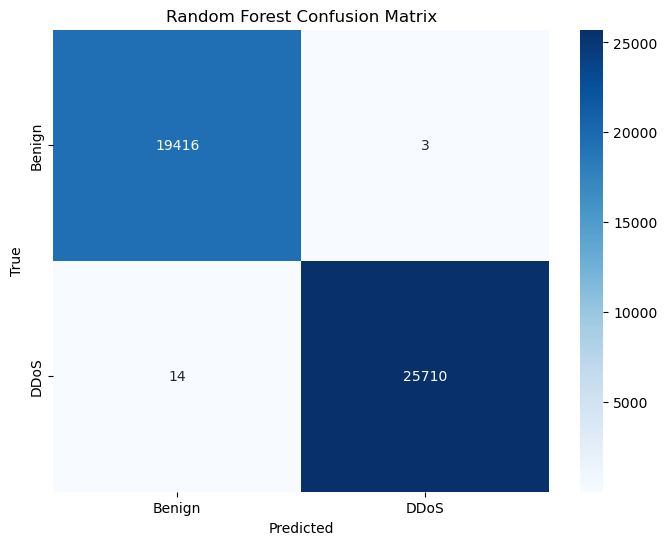

In [31]:
# 1. Train and Evaluate Random Forest
rf_model_selected = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf_model_selected, X_train_selected, X_test_selected, y_train, y_test, "Random Forest", y_probs)


Logistic Regression Metrics:
Training Time: 0.6490 seconds
Accuracy: 0.9656
F1 Score: 0.9707
Precision: 0.9434
Recall: 0.9997


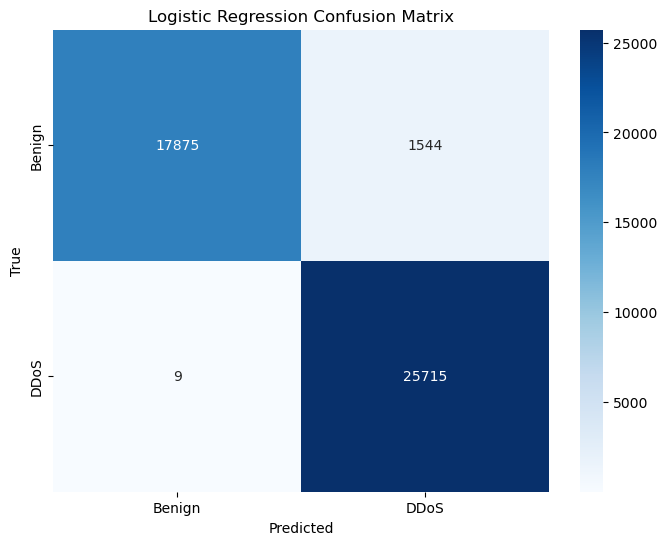

In [32]:
# 2. Train and Evaluate Logistic Regression
log_reg_model = LogisticRegression(max_iter=200, random_state=42)
evaluate_model(log_reg_model, X_train_selected, X_test_selected, y_train, y_test, "Logistic Regression", y_probs)


Support Vector Machine Metrics:
Training Time: 1451.5642 seconds
Accuracy: 0.9933
F1 Score: 0.9941
Precision: 0.9910
Recall: 0.9972


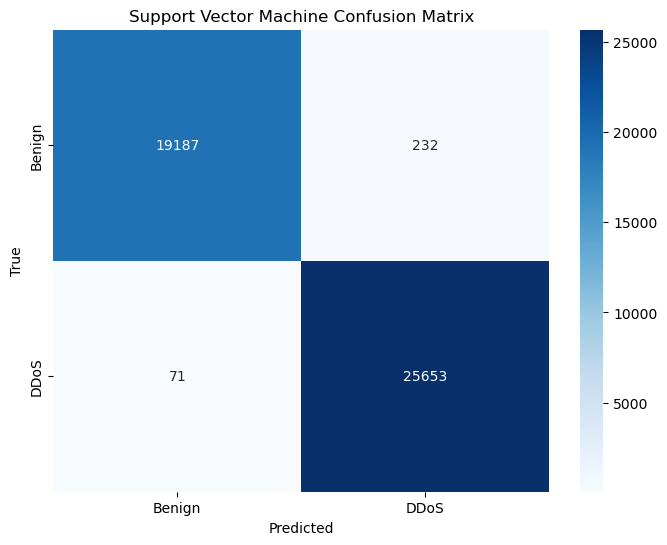

In [33]:
# 3. Train and Evaluate Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for SVM
evaluate_model(svm_model, X_train_selected, X_test_selected, y_train, y_test, "Support Vector Machine", y_probs)


In [ ]:
# 4. Train and Evaluate XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_model, X_train_selected, X_test_selected, y_train, y_test, "XGBoost", y_probs)

In [ ]:
# Train and Evaluate MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42, max_iter=500)
evaluate_model(mlp_model, X_train_selected, X_test_selected, y_train, y_test, "MLP", y_probs)

In [ ]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for model_name, y_prob in y_probs.items():
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()